In [161]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# For nice Plots
%matplotlib inline
plt.style.use('default')

sns.set(color_codes=True) # set seaborn plotting style
plt.rcParams['figure.figsize'] = [16, 4] # set the figure size for the plots
sample_size = 10000

# Single Variable Normal Distribution

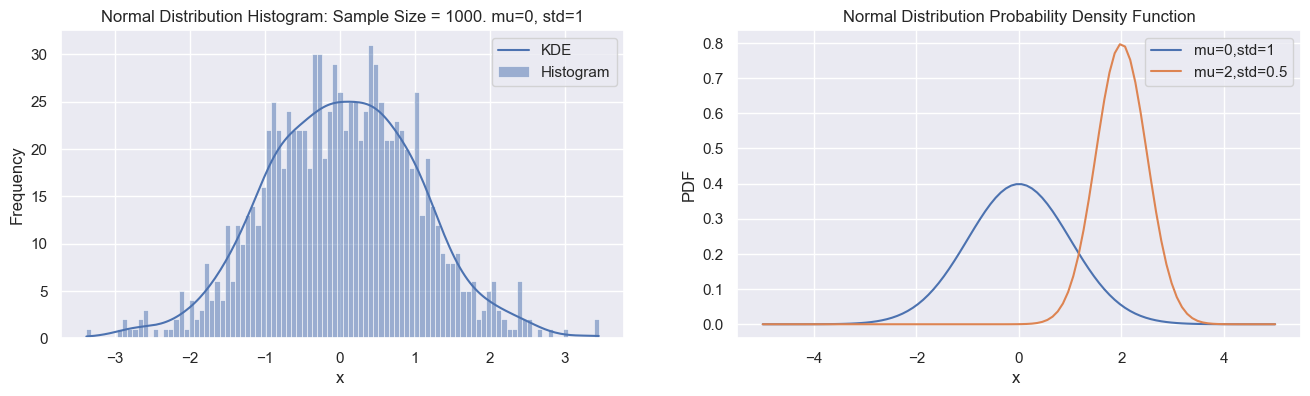

In [4]:
# import uniform distribution
from scipy.stats import norm
sample_size = 1000

# set parameters for a uniform distribution
param_loc = 0
param_scale = 1
# generate samples from this distribution
data_normal = norm.rvs(size=sample_size, loc=param_loc, scale=param_scale)

# plot a historgram of the output
plt.subplot(1, 2, 1) # layout to make 1 row, 2 columns of plots, and create to location 1.
ax1 = sns.histplot(data=data_normal, bins=100, kde=True);
ax1.set(xlabel='x ', ylabel='Frequency', 
       title=f'Normal Distribution Histogram: Sample Size = {sample_size}. mu={param_loc}, std={param_scale}');
ax1.legend(['KDE','Histogram']);

# plot the probability density function
ax2 = plt.subplot(1, 2, 2) # layout to make 1 row, 2 columns of plots, and create to location 2.
x = np.linspace(-5, 5, 100) # generate a list of x-values
y1 = norm.pdf(x, loc=param_loc, scale=param_scale) # compute the PDF at these x-values
ax2.plot(x,y1)
y2 = norm.pdf(x, loc=2, scale=0.5) # compute the PDF at these x-values
ax2.plot(x,y2)
ax2.legend(['mu=0,std=1','mu=2,std=0.5'])
ax2.set(xlabel='x ', ylabel='PDF', 
       title=f'Normal Distribution Probability Density Function');

# Multivariate Gaussian Distribution

## Generating and viewing data

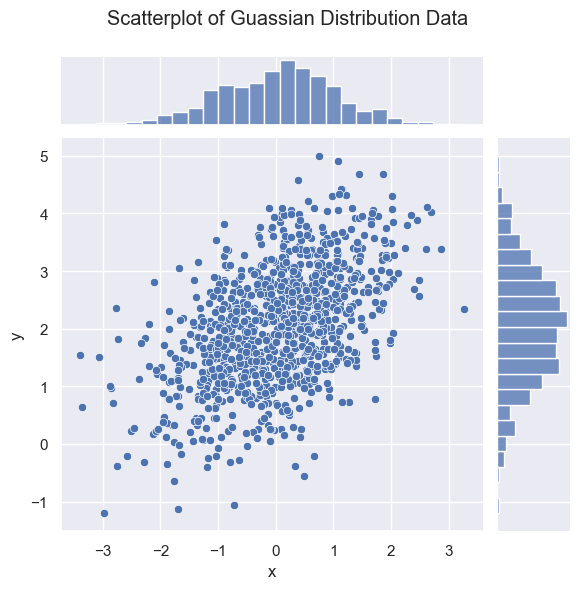

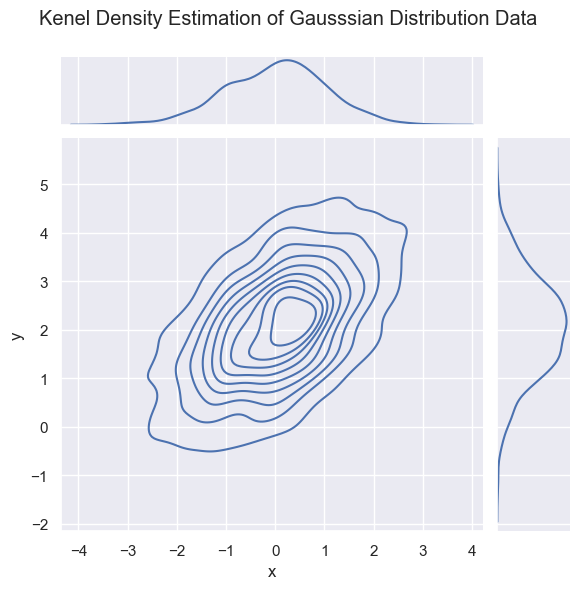

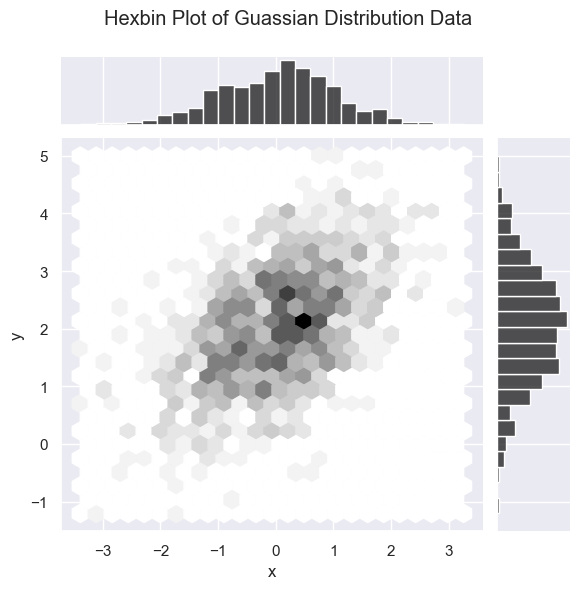

In [9]:
# Generate Mulitvariate Gaussian Data and plot with Seaborn
sample_size = 1000
param_mean = [0, 2]
param_cov = [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(param_mean, param_cov, size=sample_size)
# create a data frame from the data
df = pd.DataFrame(data, columns=["x", "y"])

# Create the Plot
ax = sns.jointplot(x="x", y="y", data=df);
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Scatterplot of Guassian Distribution Data");

ax = sns.jointplot(x="x", y="y", data=df, kind="kde");
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Kenel Density Estimation of Gausssian Distribution Data");

ax = sns.jointplot(x="x", y="y", data=df, kind="hex", color="k");
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Hexbin Plot of Guassian Distribution Data");

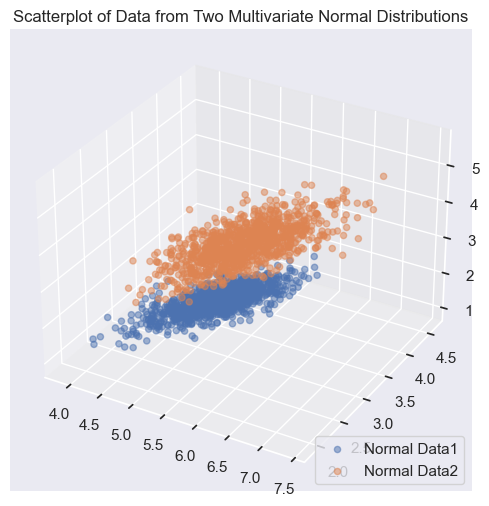

In [8]:
plt.rcParams['figure.figsize'] = [8, 6] # set the figure size for the plots
sample_size = 1000
# 3D scatterplot of data from two 3D  multivariate normal distributions
# mean and cov computed from Fisher's Iris dataset using features 'sepal_length','sepal_width', and 'petal_length'
mu_Iris_setosa = [5.01,3.42,1.46]
cov_Iris_setosa = [(.124249,.100298,0.016139), (.100298,.145180,0.011682),(0.016139,0.011682,0.030106)]
data_setosa = np.random.multivariate_normal(mu_Iris_setosa, cov_Iris_setosa, size=sample_size)
# mean and cov computed from Fisher's Iris dataset using features 'sepal_length','sepal_width', and 'petal_length'
mu_Iris_versicolor = [5.94,2.77,4.26]
cov_Iris_versicolor = [(.2664327,.0851837,.1828980), (.0851837,.0984694,.0826531),(.1828980,.0826531,.2208163)]
data_versicolor = np.random.multivariate_normal(mu_Iris_versicolor, cov_Iris_versicolor, size=sample_size)

ax = plt.axes(projection='3d');
ax.scatter(data_setosa[:,0],data_setosa[:,1],data_setosa[:,2], label='Normal Data1', alpha=0.5);
ax.scatter(data_versicolor[:,0],data_versicolor[:,1],data_versicolor[:,2], label='Normal Data2', alpha=0.5);
ax.legend(loc='lower right');
ax.set_title('Scatterplot of Data from Two Multivariate Normal Distributions');

## The Probability Density Function

In [10]:
from scipy.stats import multivariate_normal
# Create the Y,Y grid
X, Y = np.meshgrid(np.arange(-2.5, 3, 0.1), np.arange(-1, 5, 0.1))
pos = np.dstack((X,Y))
# Compute the PDF at the grid values
Z = multivariate_normal.pdf(pos, mean=param_mean, cov=param_cov);

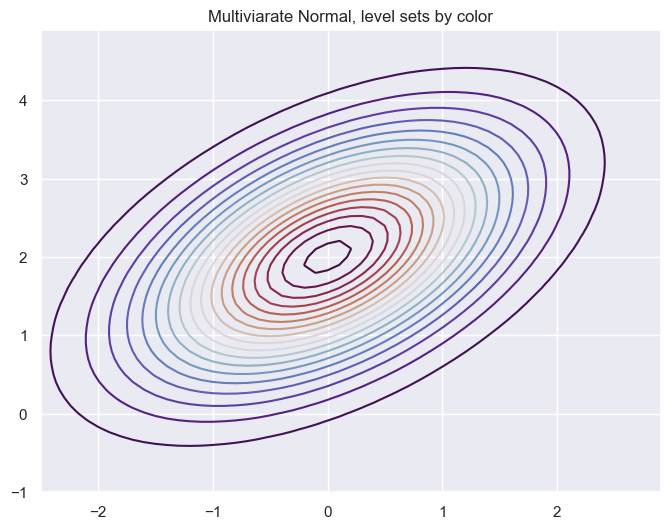

In [11]:
# basic countorplot showing level sets
plt.contour(X, Y, Z, 20, cmap='twilight_shifted');
plt.title('Multiviarate Normal, level sets by color');

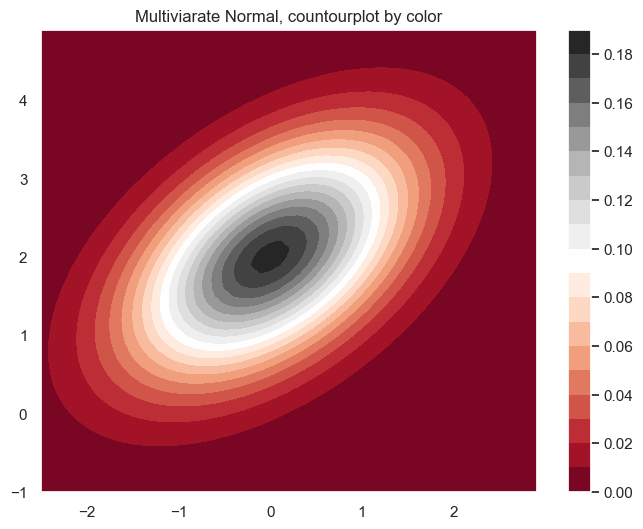

In [12]:
# contourplot using colors to show z-values
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();
plt.title('Multiviarate Normal, countourplot by color');

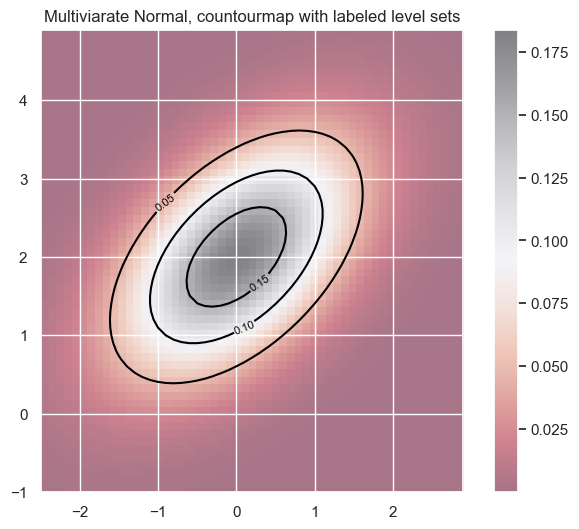

In [13]:
# contour plot with colors and level sets
contours = plt.contour(X, Y, Z, 3, colors='black') # create black countors
plt.clabel(contours, inline=True, fontsize=8) # add countors with labels
plt.imshow(Z, extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower',
           cmap='RdGy', alpha=0.5) # add background color
plt.colorbar();
plt.title('Multiviarate Normal, countourmap with labeled level sets');

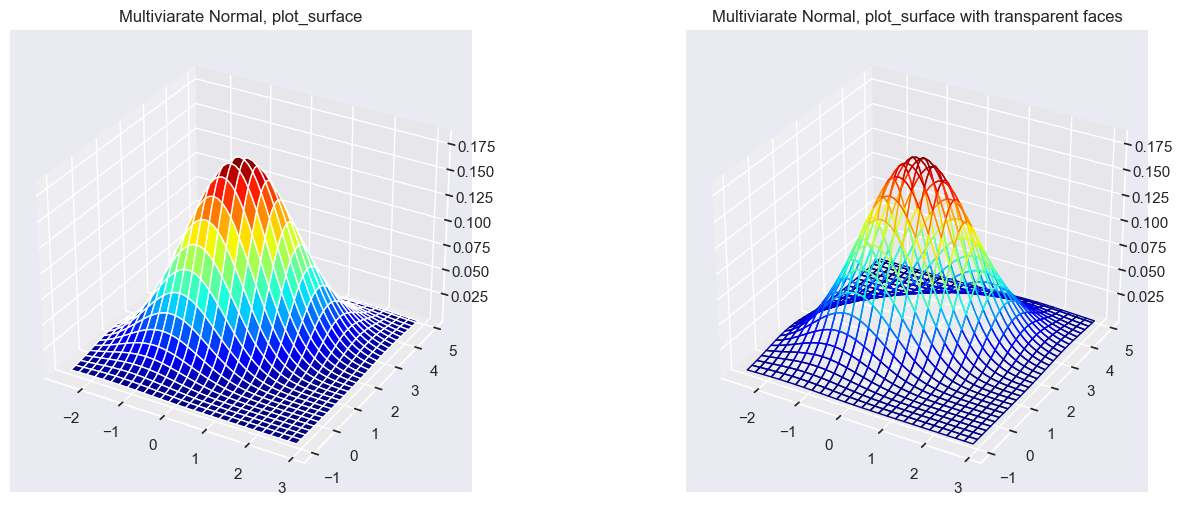

In [14]:
plt.rcParams['figure.figsize'] = [16,6] # set the figure size for the plots

# 3D plot using a grid
ax1 = plt.subplot(1, 2, 1, projection='3d') # layout to make 1 row, 2 columns of plots, and create to location 2.
ax1.plot_surface(X, Y, Z, cmap='jet');
ax1.set_title('Multiviarate Normal, plot_surface');

# 3D plot using a colored grid and transparent faces 
from matplotlib import cm# Normalize the colors based on Z value
ax2 = plt.subplot(1, 2, 2, projection='3d') # layout to make 1 row, 2 columns of plots, and create to location 2.
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.jet(norm(Z))
surf = ax2.plot_surface(X, Y, Z, facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
ax2.set_title('Multiviarate Normal, plot_surface with transparent faces');

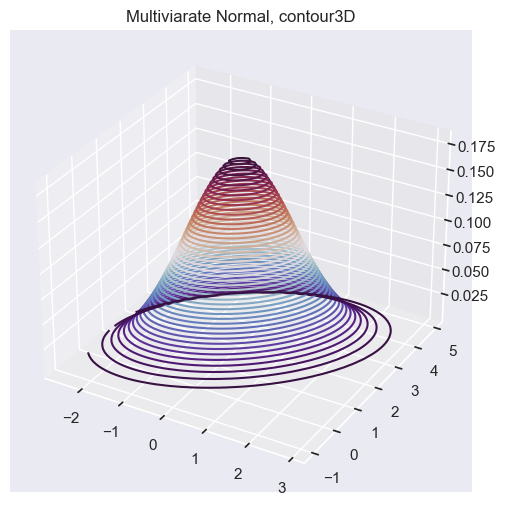

In [15]:
plt.rcParams['figure.figsize'] = [8, 6] # set the figure size for the plots
# 3d plot using level-set countours
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 55, cmap='twilight_shifted');
ax.set_title('Multiviarate Normal, contour3D');

# Analyzing Data with Gaussian Distributions

In [240]:
from sklearn.datasets import load_digits
plt.rcParams['figure.figsize'] = [16, 8] # set the figure size for the plots
digits = load_digits()
print("Digits data shape (# Observations, # Features): "+str(digits.data.shape))
#print("Digits data features: "+str(digits.feature_names))
print("Digits data class labels: "+str(digits.target_names))
#print(digits.DESCR)
digits.data = digits.data/255.
digits.data, digits.target

Digits data shape (# Observations, # Features): (1797, 64)
Digits data class labels: [0 1 2 3 4 5 6 7 8 9]


(array([[0.        , 0.        , 0.01960784, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.03921569, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.0627451 , 0.03529412,
         0.        ],
        ...,
        [0.        , 0.        , 0.00392157, ..., 0.02352941, 0.        ,
         0.        ],
        [0.        , 0.        , 0.00784314, ..., 0.04705882, 0.        ,
         0.        ],
        [0.        , 0.        , 0.03921569, ..., 0.04705882, 0.00392157,
         0.        ]]),
 array([0, 1, 2, ..., 8, 9, 8]))

(182, 64)


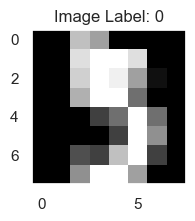

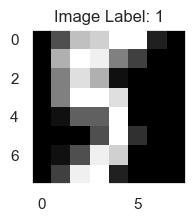

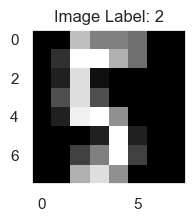

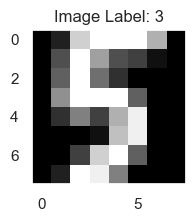

In [241]:
# Take the fives
data5 = digits.data[digits.target==5,:]
print(data5.shape)
# display a single sample
for idx in range(4):
  plt.figure(figsize=(2,2))
  plt.imshow(np.reshape(data5[idx,:], (8,8)), cmap='gray')
  plt.grid(None)
  plt.title("Image Label: "+str(idx));

(64,)
[0.00000000e+00 3.79228615e-03 3.91510450e-02 5.11312217e-02
 5.44925663e-02 4.77698772e-02 1.62464986e-02 1.72376643e-04
 2.15470804e-05 1.52768800e-02 5.80478345e-02 4.71881060e-02
 3.23206206e-02 2.44343891e-02 8.29562594e-03 1.29282482e-04
 0.00000000e+00 2.19133807e-02 5.62594268e-02 2.23443223e-02
 7.56302521e-03 2.28399052e-03 2.15470804e-04 0.00000000e+00
 0.00000000e+00 2.10514975e-02 5.61516914e-02 4.72096531e-02
 3.51863822e-02 1.63111398e-02 1.50829563e-03 0.00000000e+00
 0.00000000e+00 7.60611937e-03 3.00150830e-02 3.30532213e-02
 3.46477052e-02 2.99504417e-02 7.11053652e-03 0.00000000e+00
 0.00000000e+00 9.91165697e-04 4.95582849e-03 1.43934497e-02
 2.89808231e-02 3.20620556e-02 9.32988580e-03 0.00000000e+00
 0.00000000e+00 3.25360914e-03 2.26244344e-02 3.21051498e-02
 4.25123896e-02 2.87222581e-02 5.23594053e-03 0.00000000e+00
 0.00000000e+00 3.74919198e-03 4.18228830e-02 5.77892696e-02
 3.67162250e-02 9.93320405e-03 7.75694893e-04 0.00000000e+00]


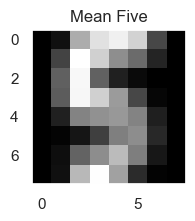

In [242]:
# compute the mean of the data (vertical down the columns)
mu = np.mean(data5, axis=0)
# mu2 = np.sum(data5, axis=0)/len(data5)
# print(np.sum(mu-mu2))
print(mu.shape)
print(mu)
plt.figure(figsize=(2,2))
plt.imshow(np.reshape(mu, (8,8)), cmap='gray')
plt.grid(None)
plt.title('Mean Five');

In [244]:
# compute the covaraince
cov = np.cov(data5.T)
# Manually Compute:
# cov2 = np.zeros((64,64))
# for idx in range(len(data5)):
#   x = np.reshape(data5[idx,:]-mu, (64,1))
#   cov2 = cov2 + np.matmul(x, x.T)
# cov2 = cov2 /(len(data5)-1)
# print(np.sum(np.abs(cov2 - cov)))
print(cov)
print('Determinent of cov: '+str(np.linalg.det(cov)))

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.36553045e-05  5.18203665e-05 ... -1.51069986e-05
   4.40698600e-07  0.00000000e+00]
 [ 0.00000000e+00  5.18203665e-05  2.48349067e-04 ... -2.56086035e-05
   2.17454881e-06  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.51069986e-05 -2.56086035e-05 ...  2.43620894e-04
   3.71988833e-05  0.00000000e+00]
 [ 0.00000000e+00  4.40698600e-07  2.17454881e-06 ...  3.71988833e-05
   1.24796133e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
Determinent of cov: 0.0


In [245]:
# compute the Mahalanobist Distance for each Five
evals, evecs = np.linalg.eig(cov)
print(evals.shape)
print(evecs.shape)
print(evals)

(64,)
(64, 64)
[3.61234802e-03 1.34129316e-03 1.24318776e-03 7.26223994e-04
 6.44905206e-04 5.29239507e-04 4.58855473e-04 4.12927062e-04
 3.21146751e-04 2.82785160e-04 2.35488938e-04 2.07492489e-04
 1.85722665e-04 1.44659344e-04 1.40770552e-04 1.35462005e-04
 1.11521419e-04 1.01869967e-04 8.37823533e-05 7.49295659e-05
 6.97161559e-05 6.18037513e-05 5.72154067e-05 5.26662341e-05
 4.72330539e-05 4.31788161e-05 4.26224739e-05 3.55002666e-05
 3.37937421e-05 3.17680191e-05 2.95765198e-05 2.62723648e-05
 5.24562891e-08 4.49152712e-07 8.76359186e-07 7.79818505e-07
 2.72266395e-06 3.03828688e-06 3.78955495e-06 5.07719477e-06
 5.25324064e-06 2.33855245e-05 2.26880740e-05 2.06137698e-05
 1.91851799e-05 9.17813391e-06 1.68193550e-05 1.53924598e-05
 1.16174046e-05 1.20008925e-05 1.30764580e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


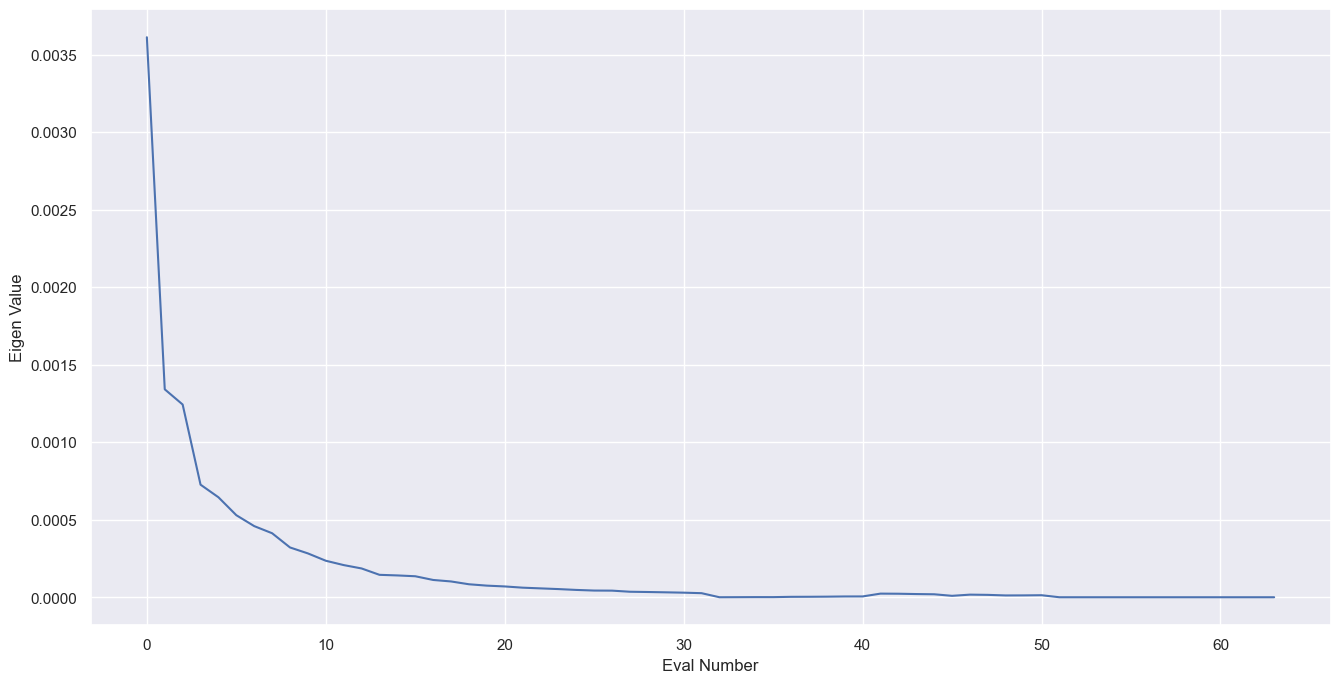

In [246]:
plt.plot(evals);
plt.xlabel('Eval Number');
plt.ylabel('Eigen Value');

In [247]:
# Note that the eigenvectors all have length 1
np.linalg.norm(evecs[0,:])

1.0

In [248]:
# Project onto the eigenvectors (PCA - each eigenvectors is a Principle Component)
PCA = np.zeros((len(data5), 64))
print(PCA.shape)
muReplicated = np.repeat(mu[np.newaxis,...], len(data5), axis=0)
print(muReplicated.shape)
for idx in range(64):
  PCA[:,idx] = np.dot(data5-muReplicated, evecs[idx,:])

(182, 64)
(182, 64)


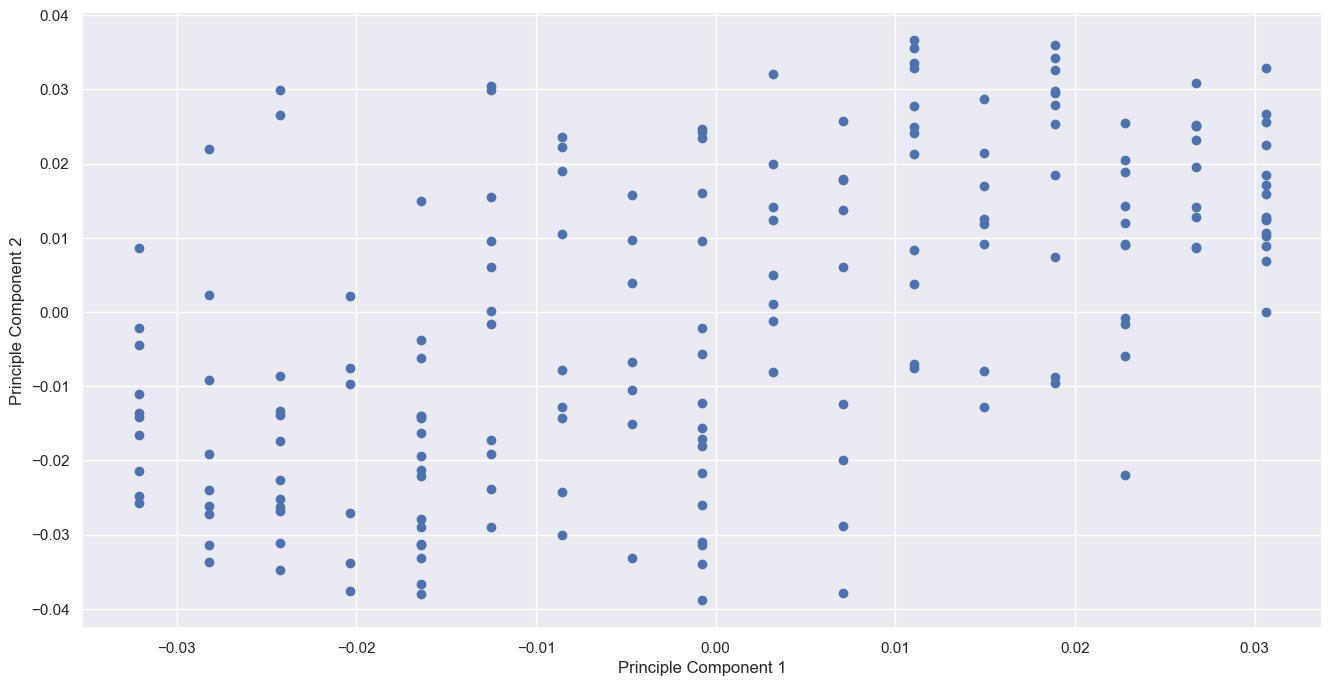

In [249]:
# Plot the data projected on the first two PCs
plt.scatter(PCA[:,0], PCA[:,1])
plt.xlabel('Principle Component 1');
plt.ylabel('Principle Component 2');

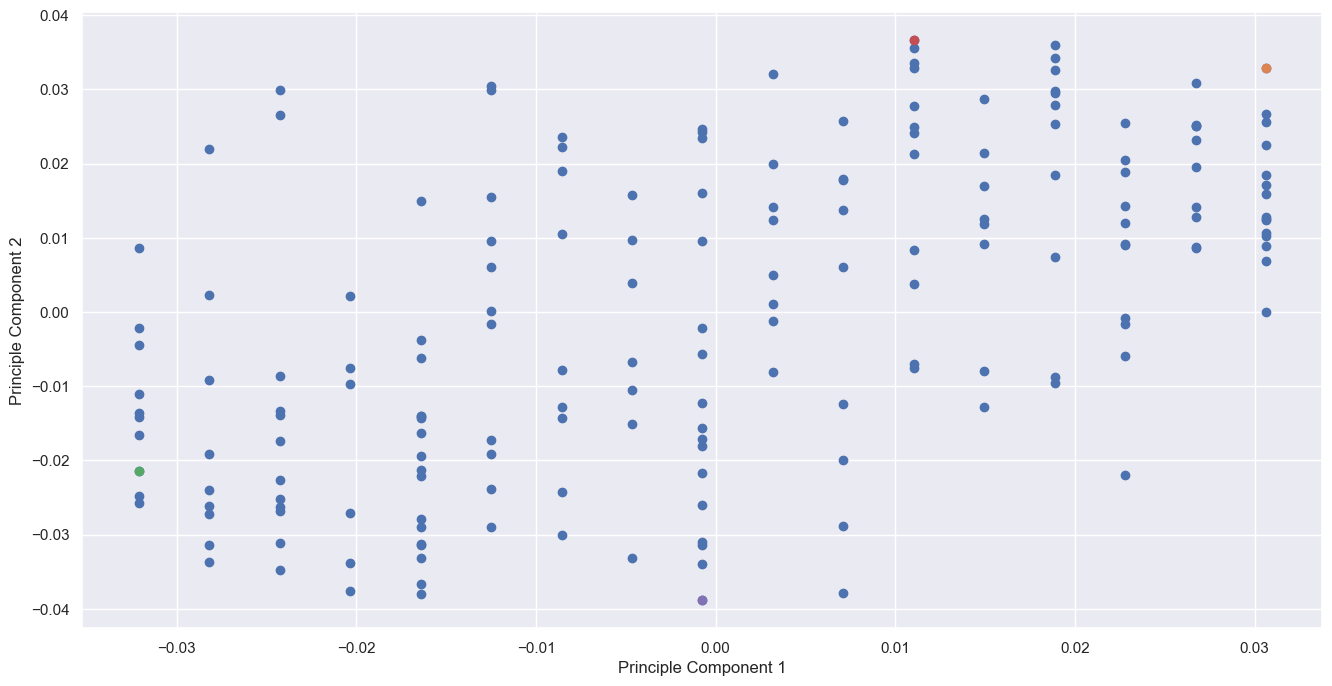

In [299]:
# Plot the data projected on the first two PCs
idx_maxPC1 = np.argmax(PCA[:,0])
idx_minPC1 = np.argmin(PCA[:,0])
idx_maxPC2 = np.argmax(PCA[:,1])
idx_minPC2 = np.argmin(PCA[:,1])
plt.scatter(PCA[:,0], PCA[:,1])
plt.scatter(PCA[idx_maxPC1,0], PCA[idx_maxPC1,1])
plt.scatter(PCA[idx_minPC1,0], PCA[idx_minPC1,1])
plt.scatter(PCA[idx_maxPC2,0], PCA[idx_maxPC2,1])
plt.scatter(PCA[idx_minPC2,0], PCA[idx_minPC2,1])
plt.xlabel('Principle Component 1');
plt.ylabel('Principle Component 2');#Look at data at extremes

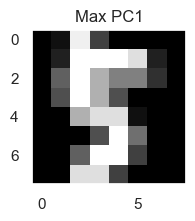

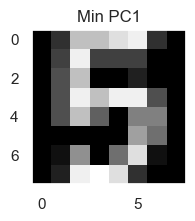

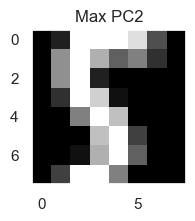

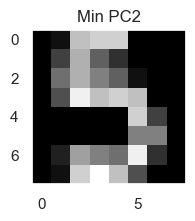

In [300]:
#Look at data at extremes
idx_maxPC1 = np.argmax(PCA[:,0])
idx_minPC1 = np.argmin(PCA[:,0])
idx_maxPC2 = np.argmax(PCA[:,1])
idx_minPC2 = np.argmin(PCA[:,1])

plt.figure(figsize=(2,2))
plt.imshow(np.reshape(data5[idx_maxPC1,:], (8,8)), cmap='gray')
plt.grid(None)
plt.title('Max PC1');


plt.figure(figsize=(2,2))
plt.imshow(np.reshape(data5[idx_minPC1,:], (8,8)), cmap='gray')
plt.grid(None)
plt.title('Min PC1');


plt.figure(figsize=(2,2))
plt.imshow(np.reshape(data5[idx_maxPC2,:], (8,8)), cmap='gray')
plt.grid(None)
plt.title('Max PC2');


plt.figure(figsize=(2,2))
plt.imshow(np.reshape(data5[idx_minPC2,:], (8,8)), cmap='gray')
plt.grid(None)
plt.title('Min PC2');

Eigenvalues: [3.61234802e-03 1.34129316e-03 1.24318776e-03 7.26223994e-04
 6.44905206e-04 5.29239507e-04 4.58855473e-04 4.12927062e-04
 3.21146751e-04 2.82785160e-04 2.35488938e-04 2.07492489e-04
 1.85722665e-04 1.44659344e-04 1.40770552e-04 1.35462005e-04
 1.11521419e-04 1.01869967e-04 8.37823533e-05 7.49295659e-05
 6.97161559e-05 6.18037513e-05 5.72154067e-05 5.26662341e-05
 4.72330539e-05 4.31788161e-05 4.26224739e-05 3.55002666e-05
 3.37937421e-05 3.17680191e-05 2.95765198e-05 2.62723648e-05
 5.24562891e-08 4.49152712e-07 8.76359186e-07 7.79818505e-07
 2.72266395e-06 3.03828688e-06 3.78955495e-06 5.07719477e-06
 5.25324064e-06 2.33855245e-05 2.26880740e-05 2.06137698e-05
 1.91851799e-05 9.17813391e-06 1.68193550e-05 1.53924598e-05
 1.16174046e-05 1.20008925e-05 1.30764580e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Regularize

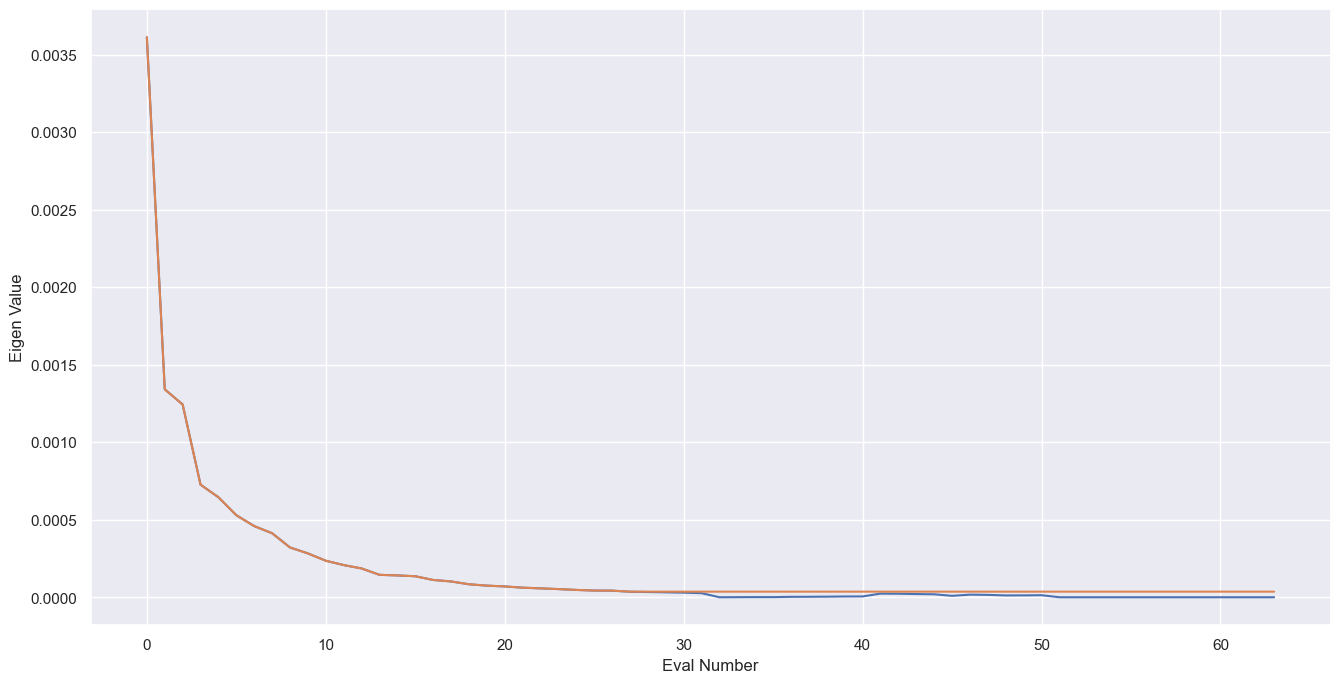

In [252]:
# Compute the inverse:
# np.linalg.inv(cov) # This fails
evalsReg = copy.deepcopy(evals)
evalsReg[np.where(evals < np.max(evals)*10**-2)]  = np.max(evals)*10**-2
plt.plot(evals);
plt.plot(evalsReg);
plt.xlabel('Eval Number');
plt.ylabel('Eigen Value');
print('Eigenvalues: '+str(evals))
print('Regularized Eigenvalues: '+str(evalsReg))

(64, 64)


Text(0.5, 1.0, 'Covariance Matrix')

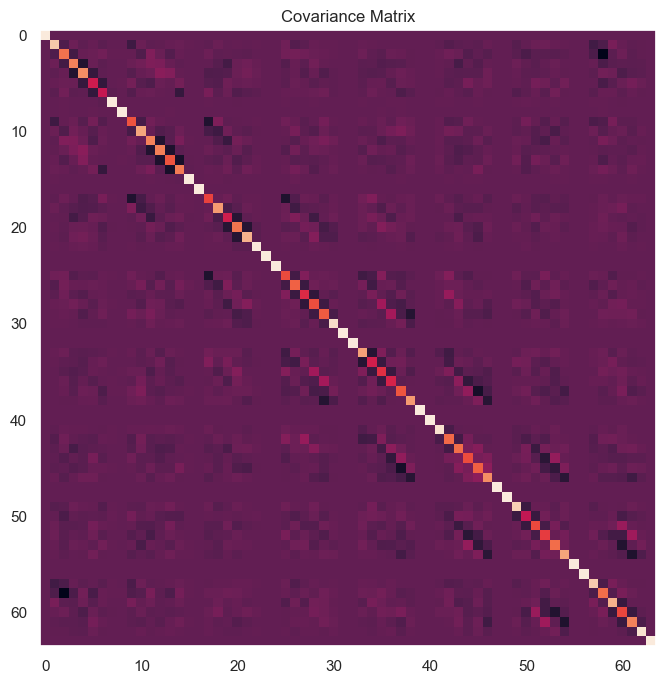

In [255]:
# now we can compute the (regularized) inverse
InvCov = np.matmul(evecs,   np.matmul(np.diag(evalsReg**(-1)), evecs.T)  )
print(InvCov.shape)
plt.imshow(InvCov)
plt.grid(None)
plt.title('Covariance Matrix')

In [283]:
# compute the Mahalanobist Distance for each Five
MD = np.zeros(len(data5))
for idx in range(len(data5)):
  x = np.reshape(data5[idx,:]-mu, (64,1))
  MD[idx] = np.sqrt(np.matmul(x.T,    np.matmul(InvCov, x)))

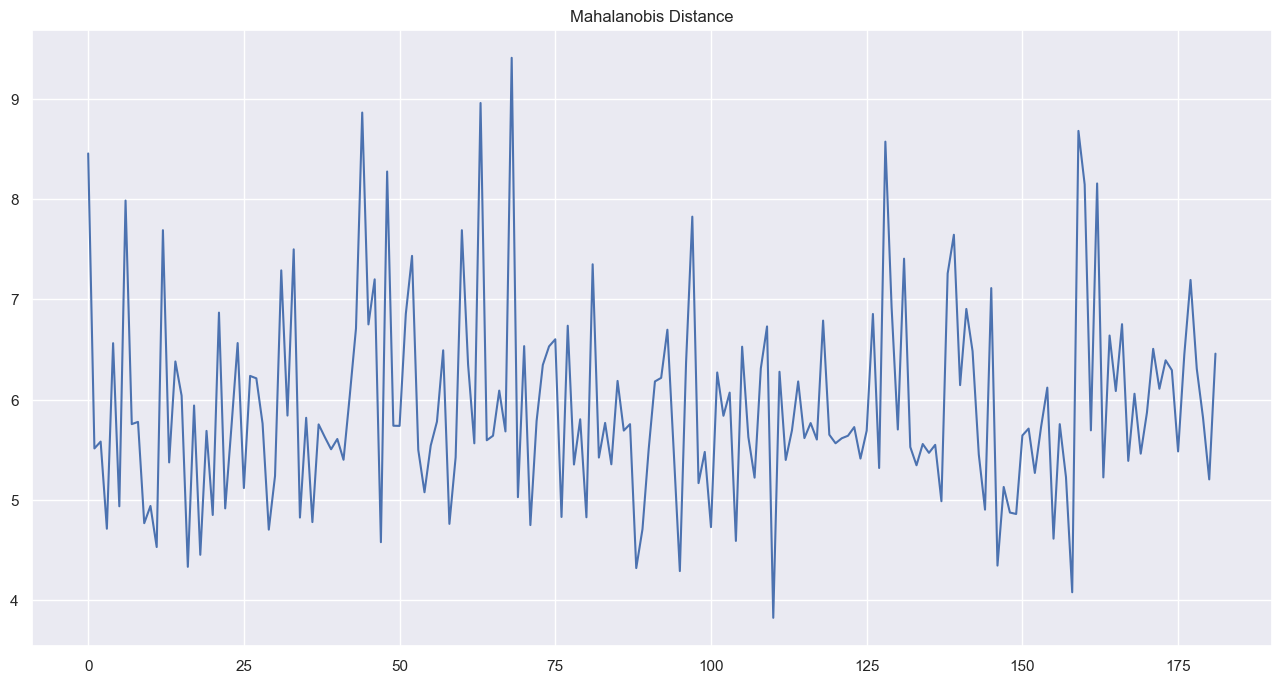

In [284]:
plt.plot(MD);
plt.title('Mahalanobis Distance');

Text(0.5, 1.0, 'Histogram of Mahalanobis Distance VAlues\n This distribution has a $\\chi^2$-Distribution')

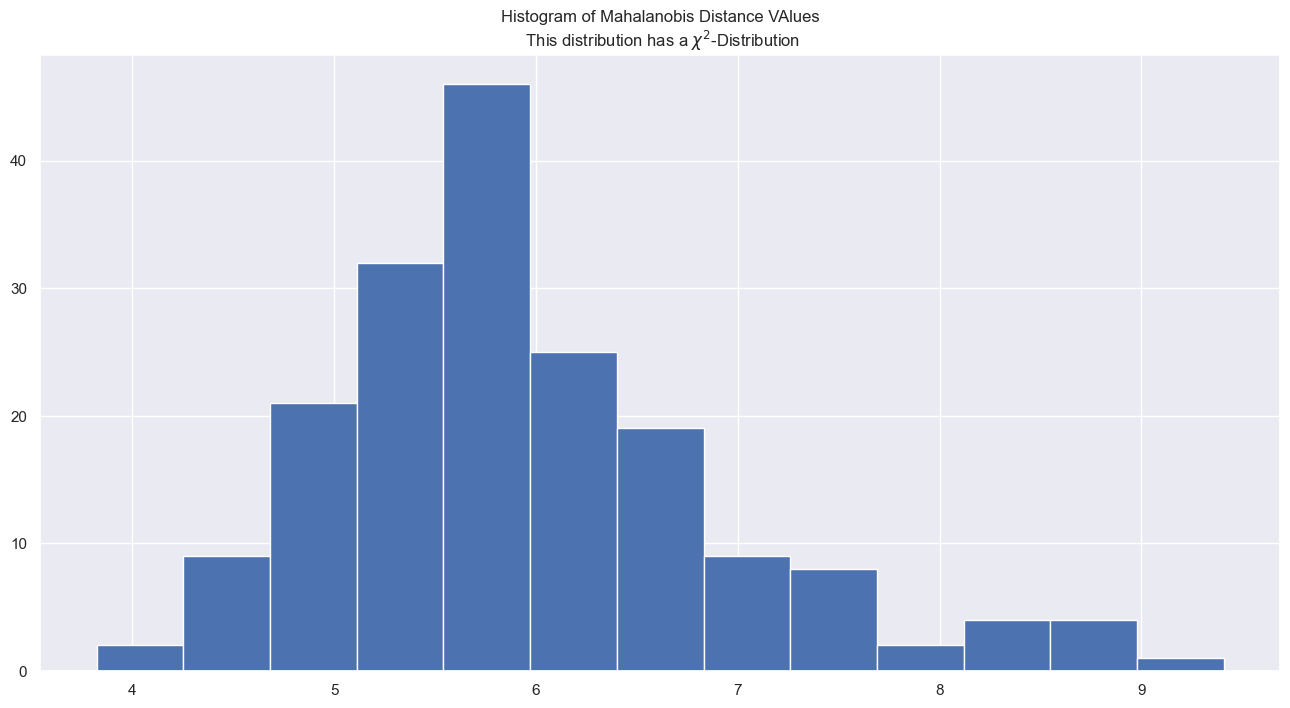

In [297]:
plt.hist(MD, bins=13);
plt.title('Histogram of Mahalanobis Distance VAlues\n This distribution has a $\chi^2$-Distribution')

In [286]:
# Plot the most anomoulous Fives
topIndices = np.flip(np.argsort(MD))[0:5]
print(MD[topIndices])

[9.40821439 8.95747985 8.86206442 8.67929404 8.57205088]


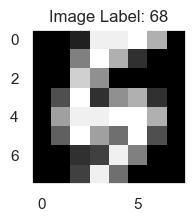

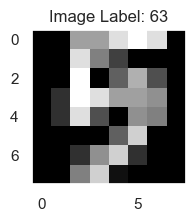

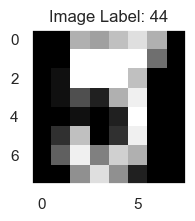

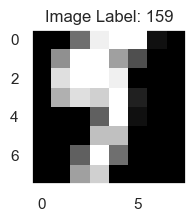

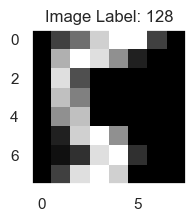

In [287]:
for idx in topIndices:
  plt.figure(figsize=(2,2))
  plt.imshow(np.reshape(data5[idx,:], (8,8)), cmap='gray')
  plt.grid(None)
  plt.title("Image Label: "+str(idx));